In [5]:
'''


Cambios:
        - Renombre de columna Valor - Cuenta
        - Creacion de barras para analizar crecimiento / decrecimiento x a_o
        -Ajuste de practica de normalizacion, en base al crecimiento poblacional, en los a;os.



'''

'\n\n\nCambios:\n\n\n\n'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


In [2]:
df_sex_agresion =  pd.read_csv('sexual_agre_cleaned.csv')

In [3]:
df_sex_agresion.shape

(12089, 6)

In [10]:
df_sex_agresion.head(3)

,A_o,Estado,Tipo_de_abuso,Subtipo_de_Abuso,Mes,Cuenta
0,2015,Puebla,Acoso sexual,Acoso sexual,Enero,11
1,2015,Puebla,Hostigamiento sexual,Hostigamiento sexual,Enero,1
2,2015,Puebla,Violaci�n simple,Violaci�n simple,Enero,43


In [9]:
df_sex_agresion.rename(columns={'Valor': 'Cuenta'}, inplace= True) # Sin el implace, tendriamos que instanciar otro objeto para poder cambiar el nombre

# Analisis Univariable

##### Variables Numericas

44.78488078940713

#### Analisis Bi-Variable

###### Normalizacion datos

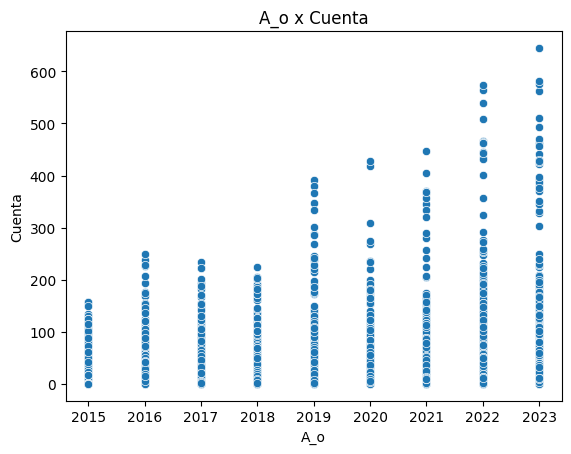

In [21]:
''' Dado que tenemos dos variables numericas empezare por ahi para ver como se relaciona el a;o con la cuenta'''

sns.scatterplot( x = 'A_o', y = 'Cuenta' , data= df_sex_agresion)
plt.title('A_o x Cuenta')
plt.show()

# NO ES UTIL EN REALIDAD, LOS DATOS ESTAN MUY SUPER PUESTOS

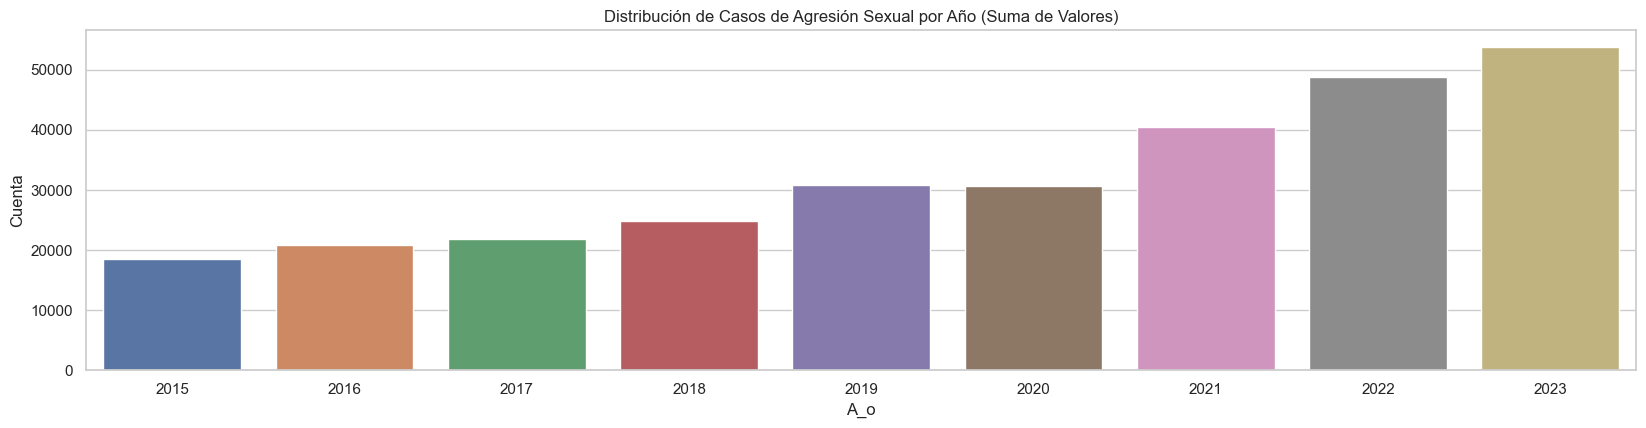

In [23]:
''' Cabe senalar que los datos no estan normalizados a el crecimiento de la poblacion, por lo cual no se puede saber
    si los casos estan disminuyendo o aumentando, necesitamos saber las cifras de la poblacion para poder hacer ese ajuste'''
    
    
# Configurar el estilo estético de las gráficas con Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura donde se mostrarán las gráficas
# Establecemos el tamaño de la figura en 20x15
plt.figure(figsize=(20, 15))

# Crear un subplot para la primera gráfica
# El primer número '3' indica que habrá 3 filas de gráficos
# El segundo número '1' indica que habrá 1 columna de gráficos
# El tercer número '1' indica que este es el primer gráfico
plt.subplot(3, 1, 1)

# Crear un gráfico de barras para mostrar la distribución por año
# 'data=df' especifica el DataFrame que estamos usando
# 'x='A_o'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría, en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
sns.barplot(data=df_sex_agresion, x='A_o', y='Cuenta', estimator=sum, errorbar=None)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

In [25]:
"""
Poblacion de mexico en esos a;os
"""

poblacion_por_ao = {
2015 :  119530753,
2016 :	121348000,
2017 :	122720000,
2018 :	124042000,
2019 :	125338000,
2020 :	126014024,
2021 :	128972000,
2022 :	130124000,
2023 :	131230000
}

# Añadir una nueva columna para los datos normalizados
df_sex_agresion['Cuenta_Normalizada'] = df_sex_agresion.apply(lambda row: (row['Cuenta'] / poblacion_por_ao[row['A_o']]) * 1000, axis=1)

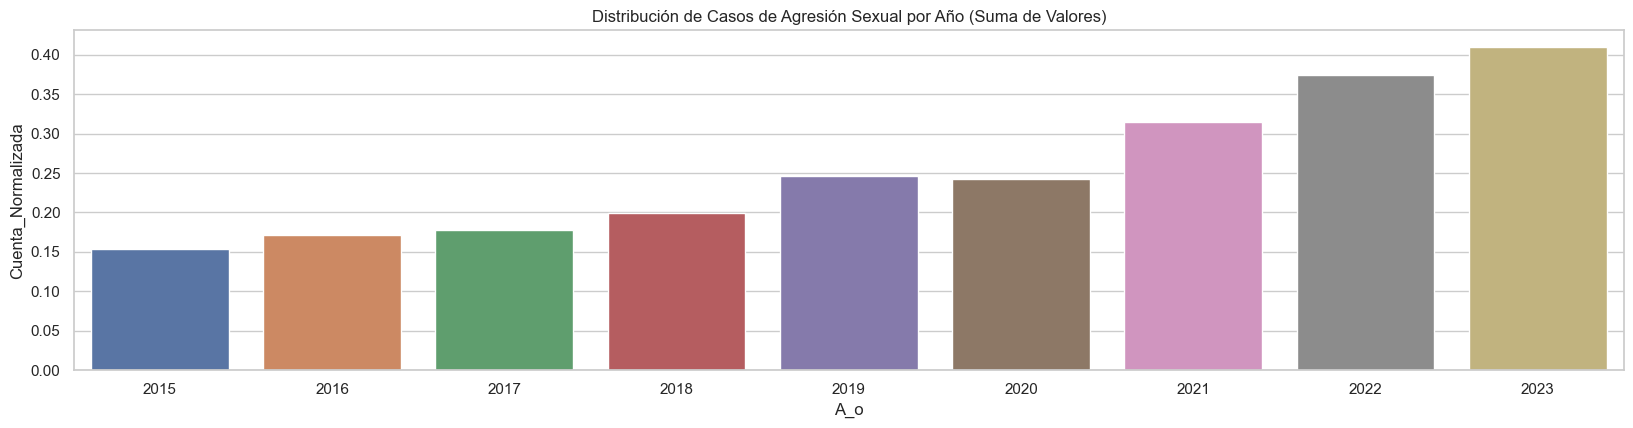

In [26]:
# Configurar el estilo estético de las gráficas con Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura donde se mostrarán las gráficas
# Establecemos el tamaño de la figura en 20x15
plt.figure(figsize=(20, 15))

# Crear un subplot para la primera gráfica
# El primer número '3' indica que habrá 3 filas de gráficos
# El segundo número '1' indica que habrá 1 columna de gráficos
# El tercer número '1' indica que este es el primer gráfico
plt.subplot(3, 1, 1)

# Crear un gráfico de barras para mostrar la distribución por año
# 'data=df' especifica el DataFrame que estamos usando
# 'x='A_o'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría, en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
sns.barplot(data=df_sex_agresion, x='A_o', y='Cuenta_Normalizada', estimator=sum, errorbar=None)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

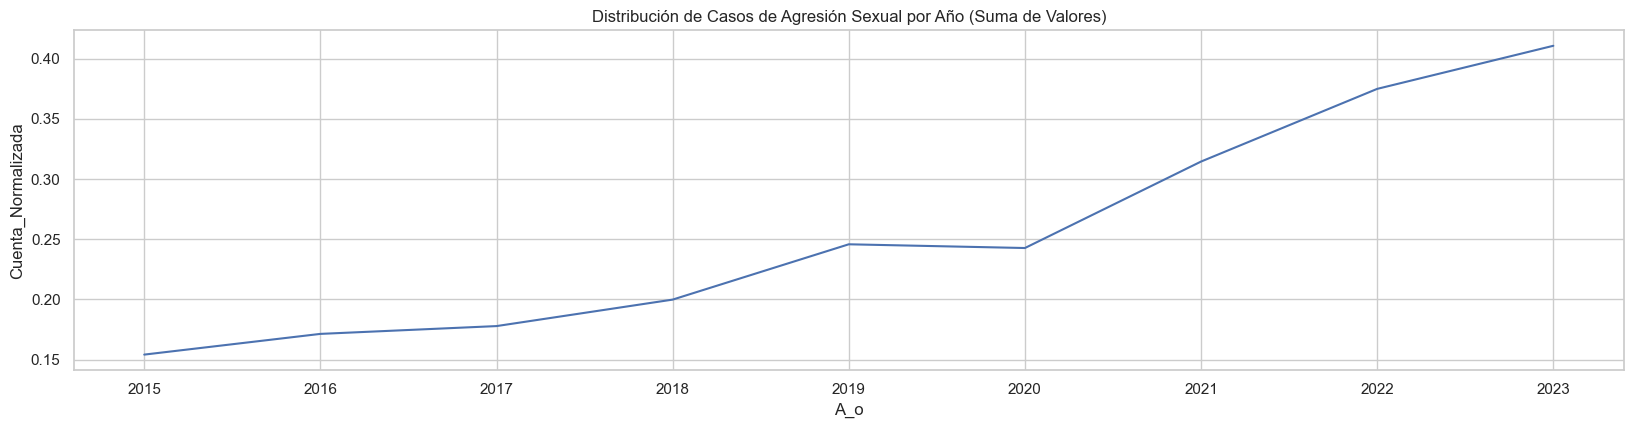

In [27]:
# Mantenemos el estilo y la figura como en tu código original
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))

# Usamos lineplot en lugar de barplot
plt.subplot(3, 1, 1)
sns.lineplot(data=df_sex_agresion, x='A_o', y='Cuenta_Normalizada', estimator=sum, err_style=None)

# Título
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

##